In [1]:
import numpy as np
from matplotlib import pyplot,cm as plt,cm
from scipy.interpolate import *
from ReferenceElement import *
import os
import imageio
from DG_functions_wave_inhomogeneous_with_potential import *

In [2]:
N = 8
K = 10
CF = 2.**(-7)
start = 0.
end = 1.
a1 = 1.
a2 = -1.
alpha = 0. 
h = (end-start)/K


reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h

In [3]:
x_p = 0.6
def source_A(t):
    a = 2*np.pi*np.sin(2*np.pi*(t-x_p)) - 2*np.pi*np.cos(2*np.pi*(t+x_p)) #-FF'(t-x) -GG'(t+x)
    return a
def source_B(t):
    b = np.cos(2*np.pi*(t-x_p)) - np.sin(2*np.pi*(t+x_p))
    return b#FF(t-x) - GG(t+x)
def source_B_dot(t):
    b_dot = -2*np.pi*np.sin(2*np.pi*(t-x_p)) - 2*np.pi*np.cos(2*np.pi*(t+x_p))
    return b_dot
def potential_term(x):
    return 0*x
def source_for_v(t):
    return -(source_A(t) + source_B_dot(t))

In [4]:
x = get_x_elements(start,end, K, reference_interval)
dx_min = get_dx_min(x)

In [5]:
def u_ana_left(x,t):
    return np.sin(2*np.pi*(x+t))
def u_ana_right(x,t):
    return np.cos(2*np.pi*(t-x))
x_ana = np.linspace(0,1,101)
theta_left = np.heaviside(0.6-x_ana,1)
theta_right = np.heaviside(x_ana-0.6,1)

In [6]:
u_left = u_ana_left(x,0)*np.heaviside(0.6-x,1)
u_right = u_ana_right(x,0)*np.heaviside(x - 0.6,0)
u = u_left+u_right

v = 4*np.pi*np.cos(2*np.pi*x)*np.heaviside(0.6-x,1)

In [7]:
t = 0.
V = potential_term(x)
t_target = 0.5
dt = CF*dx_min
nt = int((t_target-t)/dt)
print (nt)

12769


In [8]:
for n in range(nt):
    un = u.copy()
    vn = v.copy()
    u = RK4_Step(dt,DG_du_dt_radiative,un, K,N,t,a1,alpha,M_inv, M_inv_S,source_B,vn)
    v = RK4_Step(dt,DG_du_dt_radiative,vn, K,N,t,a2,alpha,M_inv, M_inv_S,source_for_v,None)
    t += dt 


(-2, 2)

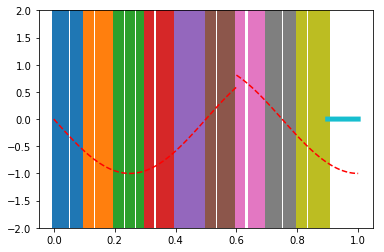

In [9]:
for i in range(len(u)):
    plt.plot(x[i],u[i], lw = 5)
plt.plot(x_ana[:61], (theta_left*u_ana_left(x_ana,t))[:61],linestyle ='--',color = 'red')
plt.plot(x_ana[60:], (theta_right*u_ana_right(x_ana,t))[60:], linestyle ='--',color = 'red')
plt.ylim(-2,2)

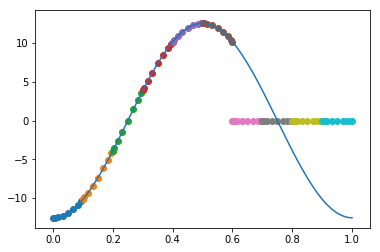

In [10]:
for i in range(len(v)):
    plt.scatter(x[i], v[i], marker = 'o')
v_ana = 4*np.pi*np.cos(2*np.pi*(x+t))
plt.plot(x.flatten(),v_ana.flatten())

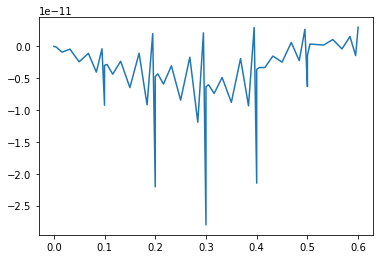

In [11]:
plt.plot(x[:6].flatten(),(v - v_ana)[:6].flatten())

In [12]:
def u_ana_left(x,t):
    return np.sin(2*np.pi*(x+t))
def u_ana_right(x,t):
    return np.cos(2*np.pi*(t-x))
    

In [13]:
x_ana = np.linspace(0,1,101)
